In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import pickle

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.tree import DecisionTreeRegressor, export_text

# Enable auto-reload for module reloading during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts
import utils.decision_tree as dt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load dataset
assets = pd.read_csv('../dataset/king_country_houses_aa.csv')

In [4]:
# First look at the first few rows of the dataset
assets.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Copy of the data
df = assets.copy()

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
dtype: float64

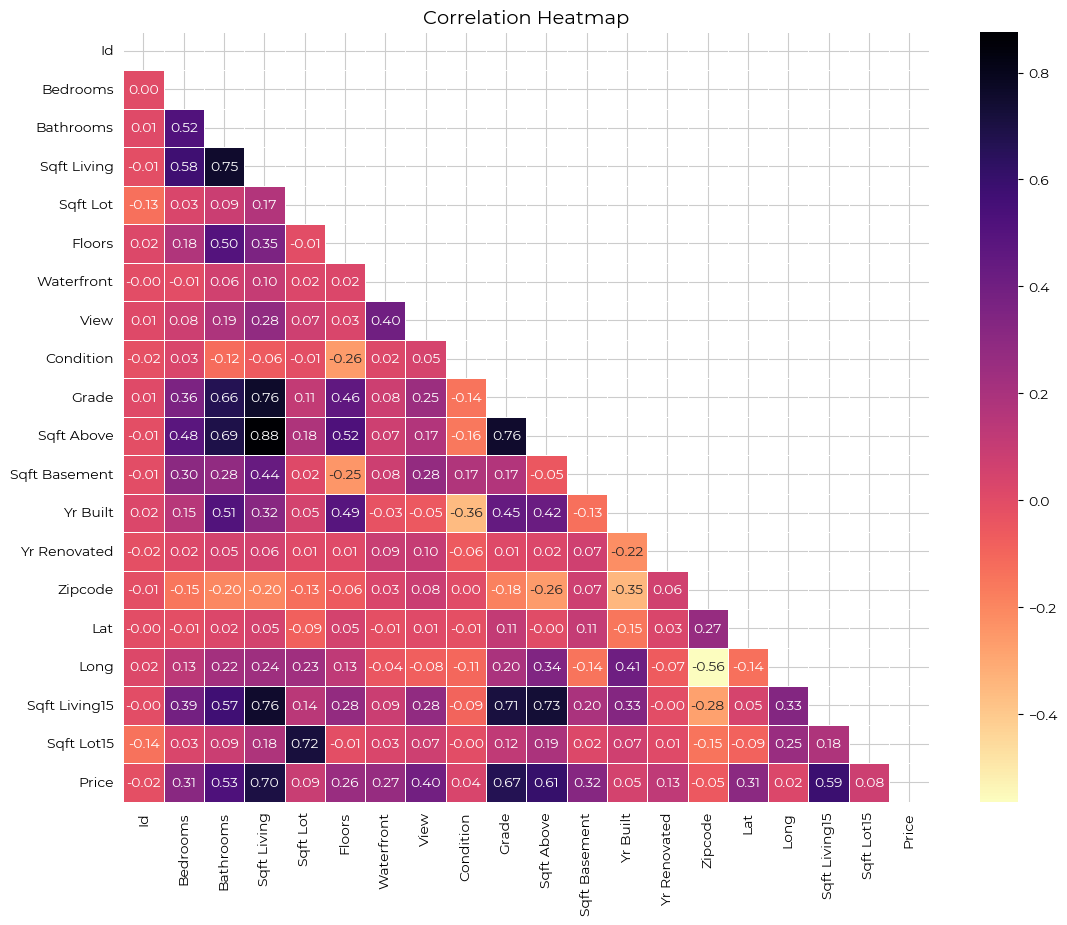

In [7]:
correlation_with_price = dt.corr_heatmap(df)
correlation_with_price

## Decision Tree predictions using outliers

In [8]:
# Selecting features 
correlated_columns = dt.selecting_features(df, corr_coef=0.25)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 



In [9]:
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=0.4)

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646


In [10]:
results_df, results_list, model_tree = dt.train_decision_tree(X_train, X_test, y_train, y_test)
results_df.head()

  Model Metrics: | R2 = 0.6416 | RMSE = 231455.5397 | MAE = 125950.7574 | MSE = 53571666875.0802 |
⚠️ The model is moderately good, but there’s room for improvement.



,Actual Price,Predicted Price,Difference
735,365000.0,365000.0,0.0
2830,865000.0,1265000.0,-400000.0
4106,1038000.0,1078500.0,-40500.0
16218,1490000.0,1580000.0,-90000.0
19964,711000.0,695000.0,16000.0


In [11]:
# Testing different test sizes
results_list = dt.create_train_test_splits_and_evaluate(df, correlated_columns)

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.6027 | RMSE = 240581.5981 | MAE = 128586.4302 | MSE = 57879505325.7364 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.5951 | RMSE = 247422.8555 | MAE = 125903.423 | MSE = 61218069416.6158 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.6055 | RMSE = 238638.9771 | MAE = 126658.1947 | MSE = 56948561394.7899 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646
  Model Metrics: | R2 = 0.6416 | RMSE = 231455.5397 | MAE = 125950.7574 | MSE = 53571666875.0802 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 50%:
  Training set size: 10806 | Test set size: 10807
  

In [12]:
# Evaluating different test_size and features
results_df = dt.evaluate_different_correlations(df)

Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.6027 | RMSE = 240581.5981 | MAE = 128586.4302 | MSE = 57879505325.7364 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.5951 | RMSE = 247422.8555 | MAE = 125903.423 | MSE = 61218069416.6158 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.6055 | RMSE = 238638.9771 | MAE = 126658.1947 | MSE = 56948561394.7899 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 40%:
  Training set size: 12967 | Test set siz

In [13]:
# A resume of metrics for test_size and features
results_df.head(55)

,Correlation Coefficient ≥,Test Size (%),R²,RMSE,MAE,MSE
0,0.20,0.1,0.602692,240581.598061,128586.430157,5.787951e+10
1,0.20,0.2,0.595056,247422.855486,125903.423009,6.121807e+10
2,0.20,0.3,0.605528,238638.977107,126658.194736,5.694856e+10
3,0.20,0.4,0.641626,231455.539737,125950.757364,5.357167e+10
4,0.20,0.5,0.643189,230538.016145,124788.914685,5.314778e+10
5,0.25,0.1,0.602692,240581.598061,128586.430157,5.787951e+10
6,0.25,0.2,0.595056,247422.855486,125903.423009,6.121807e+10
7,0.25,0.3,0.605528,238638.977107,126658.194736,5.694856e+10
8,0.25,0.4,0.641626,231455.539737,125950.757364,5.357167e+10
9,0.25,0.5,0.643189,230538.016145,124788.914685,5.314778e+10


In [14]:
# Cross validation
results, average = dt.cross_validate_model(df, correlated_columns)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9993
Average Test R²:  0.6408
⚠️ The model is moderately good, but there's room for improvement in its generalization.



,Fold,Train R²,Test R²
0,1,0.9992,0.5951
1,2,0.9994,0.6619
2,3,0.9994,0.6855
3,4,0.9993,0.6180
4,5,0.9993,0.6433


In [15]:
# Cross validation with different folds
results_by_n_splits = dt.tunning_cross_validate_model(df, correlated_columns)

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9993
Average Test R²:  0.6408
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 7
Average Training R²:  0.9993
Average Test R²:  0.6301
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 10
Average Training R²:  0.9992
Average Test R²:  0.6307
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 13
Average Training R²:  0.9992
Average Test R²:  0.625
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 15
Average Training R²:  0.9992
Average Test R²:  0.633
⚠️ The model is moderately good, but there's room for improvement in its generalization.



In [16]:
results_by_n_splits.head(5)

,n_splits,Average Train R²,Average Test R²
0,5,0.9993,0.6408
1,7,0.9993,0.6301
2,10,0.9992,0.6307
3,13,0.9992,0.6250
4,15,0.9992,0.6330


In [24]:
#results_df = dt.perform_grid_search(df)

In [17]:
best_parameters = {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
best_correlation = 0.25
best_test_size = 0.4
final_model = DecisionTreeRegressor(**best_parameters, random_state=42)


correlated_columns = dt.selecting_features(df, corr_coef=best_correlation)
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=best_test_size)
results_df, results_list, final_model = dt.train_decision_tree(X_train, X_test, y_train, y_test, model_tree=final_model)
results_df.head()

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646
  Model Metrics: | R2 = 0.758 | RMSE = 190199.5037 | MAE = 103219.8816 | MSE = 36175851192.8226 |
✅ The model performs well! It explains a large portion of the variance.



,Actual Price,Predicted Price,Difference
735,365000.0,4.070281e+05,-42028.125828
2830,865000.0,7.836838e+05,81316.165192
4106,1038000.0,1.000130e+06,37869.527778
16218,1490000.0,1.786812e+06,-296812.500000
19964,711000.0,7.756491e+05,-64649.100402


In [18]:
results, average = dt.cross_validate_model(df, correlated_columns, model_tree=final_model)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.8442
Average Test R²:  0.7507
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.8467,0.7270
1,2,0.8406,0.7496
2,3,0.8403,0.7544
3,4,0.8446,0.7752
4,5,0.8487,0.7475


<string>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


,Feature,Importance
1,grade,0.394105
0,sqft_living,0.299450
8,lat,0.190810
9,waterfront,0.045683
5,view,0.027117
3,sqft_living15,0.020977
6,sqft_basement,0.007615
2,sqft_above,0.006894
4,bathrooms,0.002703
10,floors,0.002546


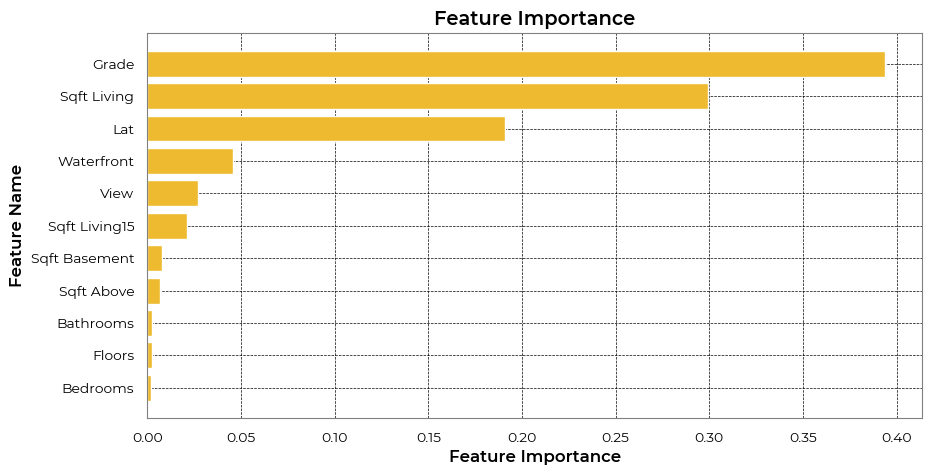

In [20]:
# Get feature importance scores
importance_df = dt.feature_score(final_model, X_train)
importance_df

In [21]:
# Initialize RFE and select the top 5 features
correlated_columns, results_df, final_model = dt.feature_selection(final_model, X_train, X_test, y_train, y_test, features = 5)

Selected Features: Index(['sqft_living', 'grade', 'view', 'lat', 'waterfront'], dtype='object')
  Model Metrics: | R2 = 0.7643 | RMSE = 187710.7007 | MAE = 103895.9869 | MSE = 35235307175.9956 |
✅ The model performs well! It explains a large portion of the variance.



In [22]:
results_df.head(5)

,Actual Price,Predicted Price,Difference
735,365000.0,3.684360e+05,-3436.000000
2830,865000.0,7.995310e+05,65468.970874
4106,1038000.0,1.079671e+06,-41671.136364
16218,1490000.0,1.729167e+06,-239166.666667
19964,711000.0,8.631664e+05,-152166.387352


In [23]:
results, average = dt.cross_validate_model(df, correlated_columns, model_tree=final_model)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.8347
Average Test R²:  0.7641
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.8369,0.7655
1,2,0.8310,0.7494
2,3,0.8320,0.7677
3,4,0.8346,0.7848
4,5,0.8389,0.7533


In [24]:
print(export_text(final_model, feature_names=correlated_columns))

|--- grade <= 8.50
|   |--- lat <= 47.53
|   |   |--- sqft_living <= 1938.00
|   |   |   |--- sqft_living <= 1428.50
|   |   |   |   |--- view <= 0.50
|   |   |   |   |   |--- lat <= 47.51
|   |   |   |   |   |   |--- sqft_living <= 1105.00
|   |   |   |   |   |   |   |--- lat <= 47.38
|   |   |   |   |   |   |   |   |--- sqft_living <= 950.00
|   |   |   |   |   |   |   |   |   |--- sqft_living <= 710.00
|   |   |   |   |   |   |   |   |   |   |--- value: [209416.67]
|   |   |   |   |   |   |   |   |   |--- sqft_living >  710.00
|   |   |   |   |   |   |   |   |   |   |--- value: [174066.41]
|   |   |   |   |   |   |   |   |--- sqft_living >  950.00
|   |   |   |   |   |   |   |   |   |--- grade <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- value: [189940.64]
|   |   |   |   |   |   |   |   |   |--- grade >  6.50
|   |   |   |   |   |   |   |   |   |   |--- value: [205683.47]
|   |   |   |   |   |   |   |--- lat >  47.38
|   |   |   |   |   |   |   |   |--- sqft_living <= 795.0

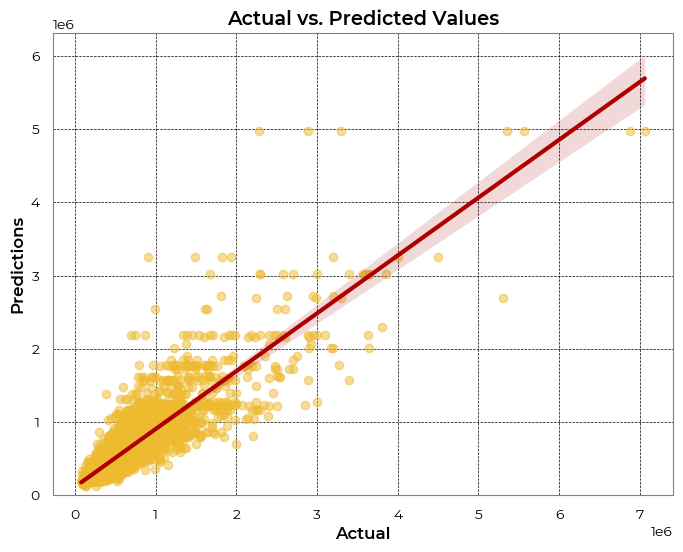

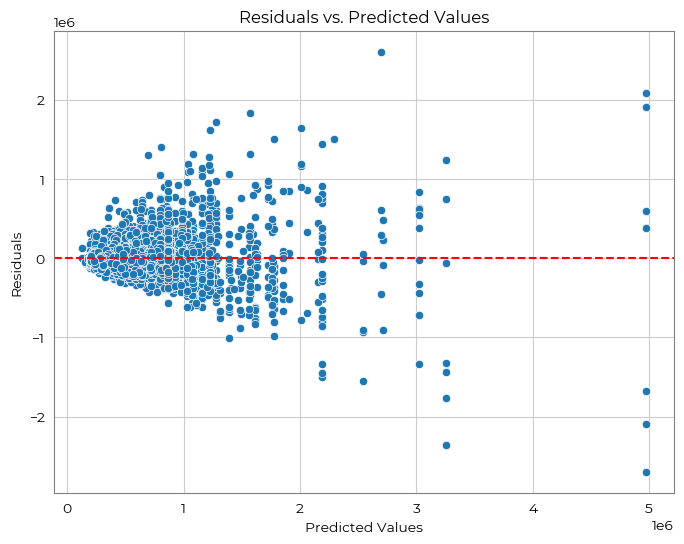

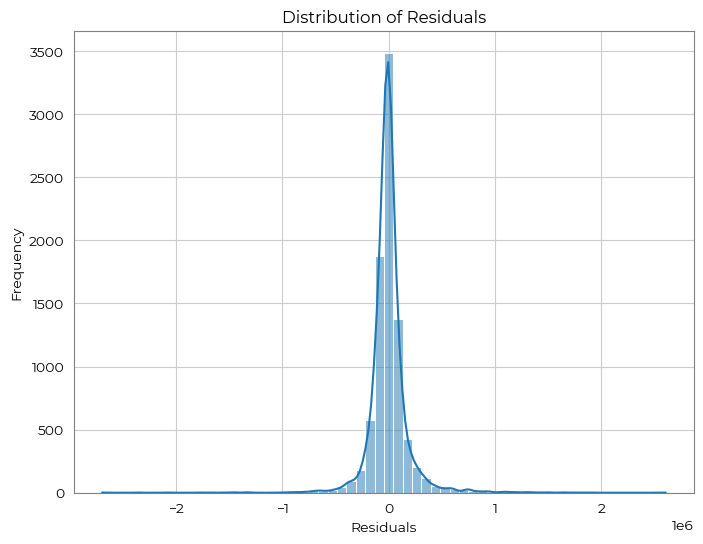

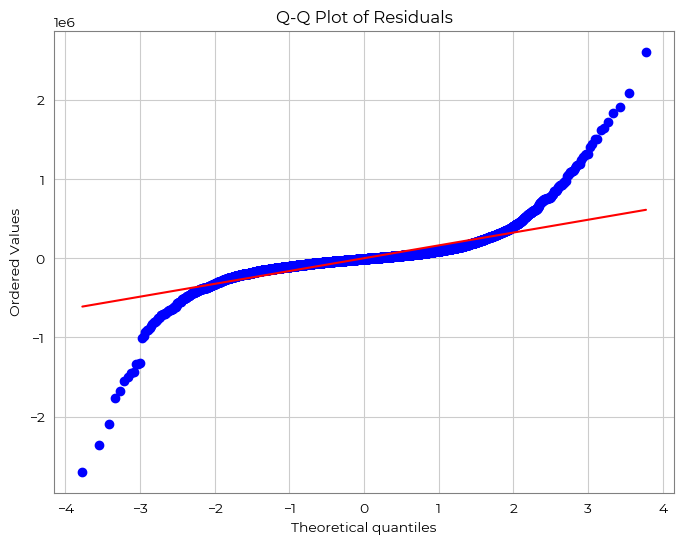

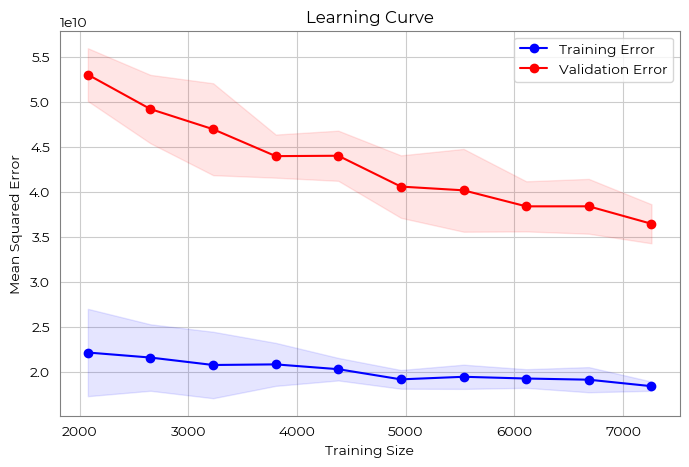

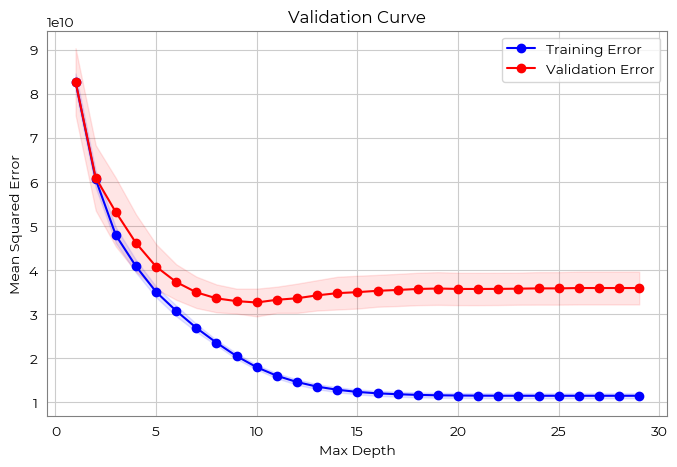

In [25]:
dt.model_validation(results_df, final_model, X_train, X_test, y_train, y_test)

In [26]:
# Converting the price to log scale to reduce outliers
df['log_price'] = np.log(df['price'])
X_train_log, X_test_log, y_train_log, y_test_log = dt.select_training_set_log(df, correlated_columns, test_size=best_test_size)
results_df_log, results_list_log, model_final_log = dt.train_decision_tree_log(X_train_log, X_test_log, y_train_log, y_test_log)
results_df_log.head()

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646
  Model Metrics: | R2 = 0.6116 | RMSE = 240951.8994 | MAE = 129947.158 | MSE = 58057817814.5519 |
⚠️ The model is moderately good, but there’s room for improvement.



,Actual Price,Predicted Price,Difference
735,365000.0,320000.0,45000.0
2830,865000.0,776000.0,89000.0
4106,1038000.0,1225000.0,-187000.0
16218,1490000.0,1815000.0,-325000.0
19964,711000.0,1095000.0,-384000.0


In [27]:
results_log, average_log = dt.cross_validate_model_log(df, correlated_columns, model_tree=model_final_log)
results_log

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9992
Average Test R²:  0.6258
⚠️ The model is moderately good, but there's room for improvement in its generalization.



,Fold,Train R²,Test R²
0,1,0.9991,0.6235
1,2,0.9993,0.5914
2,3,0.9992,0.6908
3,4,0.9991,0.6409
4,5,0.9992,0.5827


In [28]:
#results_df_log = dt.perform_grid_search_log(df)

In [29]:
best_parameters = {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
best_correlation = 0.2
best_test_size = 0.2
final_model_log = DecisionTreeRegressor(**best_parameters, random_state=42)


correlated_columns = dt.selecting_features_log(df, corr_coef=best_correlation)
X_train, X_test, y_train, y_test = dt.select_training_set_log(df, correlated_columns, test_size=best_test_size)
results_df_log, results_list_log, final_model_log = dt.train_decision_tree_log(X_train, X_test, y_train, y_test, model_tree=final_model_log)
results_df.head()

Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'floors'] 

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.7154 | RMSE = 207436.6607 | MAE = 106000.9852 | MSE = 43029968212.4508 |
⚠️ The model is moderately good, but there’s room for improvement.



,Actual Price,Predicted Price,Difference
735,365000.0,3.684360e+05,-3436.000000
2830,865000.0,7.995310e+05,65468.970874
4106,1038000.0,1.079671e+06,-41671.136364
16218,1490000.0,1.729167e+06,-239166.666667
19964,711000.0,8.631664e+05,-152166.387352


In [30]:
results_log, average_log = dt.cross_validate_model_log(df, correlated_columns, model_tree=final_model_log)
results_log

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.8431
Average Test R²:  0.7256
⚠️ The model is moderately good, but there's room for improvement in its generalization.



,Fold,Train R²,Test R²
0,1,0.8507,0.7154
1,2,0.8432,0.7308
2,3,0.8371,0.7372
3,4,0.8350,0.7532
4,5,0.8496,0.6913


<string>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


,Feature,Importance
0,grade,0.407734
5,lat,0.326941
1,sqft_living,0.205199
6,view,0.024779
2,sqft_living15,0.019888
3,sqft_above,0.007156
4,bathrooms,0.003414
9,floors,0.002110
8,sqft_basement,0.001815
7,bedrooms,0.000964


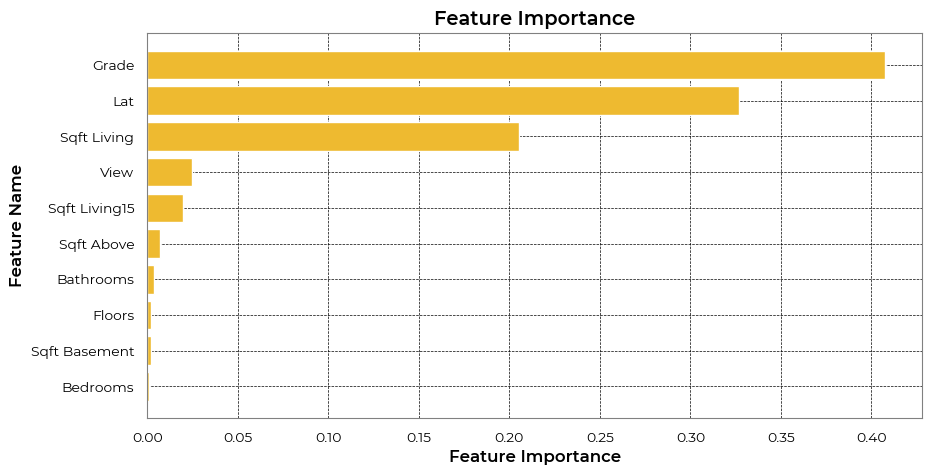

In [31]:
# Get feature importance scores
importance_df = dt.feature_score(final_model_log, X_train)
importance_df

In [32]:
# Initialize RFE and select the top 5 features
correlated_columns, results_df_log, final_model_log = dt.feature_selection_log(final_model_log, X_train, X_test, y_train, y_test, features = 5)

Selected Features: Index(['grade', 'sqft_living', 'sqft_living15', 'lat', 'view'], dtype='object')
  Model Metrics: | R2 = 0.7365 | RMSE = 199593.0361 | MAE = 103482.7934 | MSE = 39837380059.1262 |
⚠️ The model is moderately good, but there’s room for improvement.



In [33]:
results_df_log.head(5)

,Actual Price,Predicted Price,Difference
735,365000.0,3.794795e+05,-14479.470565
2830,865000.0,7.465829e+05,118417.122580
4106,1038000.0,1.890218e+06,-852218.417353
16218,1490000.0,1.599674e+06,-109673.728339
19964,711000.0,7.460787e+05,-35078.725078


In [34]:
results_log, average_log = dt.cross_validate_model(df, correlated_columns, model_tree=final_model_log)
results_log

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.8363
Average Test R²:  0.7335
⚠️ The model is moderately good, but there's room for improvement in its generalization.



,Fold,Train R²,Test R²
0,1,0.8407,0.7193
1,2,0.8320,0.7204
2,3,0.8313,0.7227
3,4,0.8361,0.7628
4,5,0.8417,0.7421


In [36]:
# Save the model
with open('../models/decision_tree_model.pkl', 'wb') as f:
    pickle.dump( final_model, f)

# with open('house_price_model_decision_tree_log.pkl', 'wb') as f:
#     pickle.dump(model_final_log, f)

## Decision Tree predictions without outliers

In [37]:
# Remove outliers using IQR method
df_copy = df.copy()
df_copy = df_copy.drop(columns=['log_price'])
Q1 = df_copy['price'].quantile(0.25)
Q3 = df_copy['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df_copy[(df_copy['price'] >= lower_bound) & (df_copy['price'] <= upper_bound)]

In [38]:
# Selecting features 
correlated_columns = dt.selecting_features(df_without_outliers, corr_coef=0.25)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors'] 



In [39]:
X_train, X_test, y_train, y_test = dt.select_training_set(df_without_outliers, correlated_columns, test_size=0.4)

🔹 Test size 40%:
  Training set size: 12280 | Test set size: 8187


In [40]:
results_df, results_list, model_tree = dt.train_decision_tree(X_train, X_test, y_train, y_test)
results_df.head()

  Model Metrics: | R2 = 0.5966 | RMSE = 130791.1207 | MAE = 91968.9347 | MSE = 17106317243.2701 |
⚠️ The model is moderately good, but there’s room for improvement.



,Actual Price,Predicted Price,Difference
16607,420000.0,585000.0,-165000.0
15557,230000.0,255000.0,-25000.0
1285,270000.0,299000.0,-29000.0
5964,807000.0,850000.0,-43000.0
7051,225000.0,260250.0,-35250.0


In [41]:
# Testing different test sizes
results_list = dt.create_train_test_splits_and_evaluate(df_without_outliers, correlated_columns)

🔹 Test size 10%:
  Training set size: 18420 | Test set size: 2047
  Model Metrics: | R2 = 0.6144 | RMSE = 126463.1813 | MAE = 87487.1864 | MSE = 15992936212.3357 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 20%:
  Training set size: 16373 | Test set size: 4094
  Model Metrics: | R2 = 0.5953 | RMSE = 129816.243 | MAE = 91705.4618 | MSE = 16852256949.9485 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 30%:
  Training set size: 14326 | Test set size: 6141
  Model Metrics: | R2 = 0.5792 | RMSE = 133172.1704 | MAE = 93548.1541 | MSE = 17734826965.3169 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 40%:
  Training set size: 12280 | Test set size: 8187
  Model Metrics: | R2 = 0.5966 | RMSE = 130791.1207 | MAE = 91968.9347 | MSE = 17106317243.2701 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 50%:
  Training set size: 10233 | Test set size: 10234
  Mode

In [42]:
# Evaluating different features
results_df = dt.evaluate_different_correlations(df_without_outliers)

Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors', 'view', 'sqft_basement'] 

🔹 Test size 10%:
  Training set size: 18420 | Test set size: 2047
  Model Metrics: | R2 = 0.6273 | RMSE = 124323.2097 | MAE = 87426.1128 | MSE = 15456260463.6878 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 20%:
  Training set size: 16373 | Test set size: 4094
  Model Metrics: | R2 = 0.6025 | RMSE = 128666.5716 | MAE = 90087.1931 | MSE = 16555086639.9767 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 30%:
  Training set size: 14326 | Test set size: 6141
  Model Metrics: | R2 = 0.6092 | RMSE = 128327.0836 | MAE = 90772.7315 | MSE = 16467840395.7227 |
⚠️ The model is moderately good, but there’s room for improvement.

🔹 Test size 40%:
  Training set size: 12280 | Test set size: 8187
  Model 

In [43]:
# A resume of metrics for test_size and features
results_df.head(55)

,Correlation Coefficient ≥,Test Size (%),R²,RMSE,MAE,MSE
0,0.20,0.1,0.627340,124323.209674,87426.112848,1.545626e+10
1,0.20,0.2,0.602462,128666.571572,90087.193087,1.655509e+10
2,0.20,0.3,0.609222,128327.083641,90772.731531,1.646784e+10
3,0.20,0.4,0.611285,128384.191799,90183.862587,1.648250e+10
4,0.20,0.5,0.619973,127537.251424,90109.067960,1.626575e+10
5,0.25,0.1,0.614401,126463.181252,87487.186370,1.599294e+10
6,0.25,0.2,0.595326,129816.243013,91705.461814,1.685226e+10
7,0.25,0.3,0.579157,133172.170386,93548.154128,1.773483e+10
8,0.25,0.4,0.596573,130791.120659,91968.934652,1.710632e+10
9,0.25,0.5,0.591188,132279.282184,92918.221175,1.749781e+10


In [44]:
# Cross validation
results, average = dt.cross_validate_model(df_without_outliers, correlated_columns, n_splits=5)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9978
Average Test R²:  0.5944
⚠️ The model is moderately good, but there's room for improvement in its generalization.



,Fold,Train R²,Test R²
0,1,0.9978,0.5953
1,2,0.9982,0.5731
2,3,0.9977,0.5993
3,4,0.9974,0.5852
4,5,0.9976,0.6188


In [45]:
# Cross validation for coefficient with price > than 0.2 and different number of folds
results_by_n_splits = dt.tunning_cross_validate_model(df_without_outliers, correlated_columns)

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9978
Average Test R²:  0.5944
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 7
Average Training R²:  0.9976
Average Test R²:  0.5943
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 10
Average Training R²:  0.9975
Average Test R²:  0.6081
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 13
Average Training R²:  0.9974
Average Test R²:  0.5943
⚠️ The model is moderately good, but there's room for improvement in its generalization.

Cross-Validation Results:
Number of folds: 15
Average Training R²:  0.9973
Average Test R²:  0.6004
⚠️ The model is moderately good, but there's room for improvement in its generalization.



In [46]:
results_by_n_splits.head(5)

,n_splits,Average Train R²,Average Test R²
0,5,0.9978,0.5944
1,7,0.9976,0.5943
2,10,0.9975,0.6081
3,13,0.9974,0.5943
4,15,0.9973,0.6004


In [52]:
#results_df = dt.perform_grid_search(df_without_outliers)

In [47]:
best_parameters = {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
best_correlation = 0.2
best_test_size = 0.3
final_model_wo = DecisionTreeRegressor(**best_parameters, random_state=42)


correlated_columns = dt.selecting_features(df_without_outliers, corr_coef=best_correlation)
X_train, X_test, y_train, y_test = dt.select_training_set(df_without_outliers, correlated_columns, test_size=best_test_size)
results_df, results_list, final_model_wo = dt.train_decision_tree(X_train, X_test, y_train, y_test, model_tree=final_model_wo)
results_df.head()

Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors', 'view', 'sqft_basement'] 

🔹 Test size 30%:
  Training set size: 14326 | Test set size: 6141
  Model Metrics: | R2 = 0.7481 | RMSE = 103025.463 | MAE = 73998.4102 | MSE = 10614246028.1457 |
⚠️ The model is moderately good, but there’s room for improvement.



,Actual Price,Predicted Price,Difference
16607,420000.0,534710.955556,-114710.955556
15557,230000.0,230736.619048,-736.619048
1285,270000.0,288597.756410,-18597.756410
5964,807000.0,611571.214286,195428.785714
7051,225000.0,246020.900621,-21020.900621


In [48]:
results, average = dt.cross_validate_model(df_without_outliers, correlated_columns, model_tree=final_model_wo)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.8326
Average Test R²:  0.749
⚠️ The model is moderately good, but there's room for improvement in its generalization.



,Fold,Train R²,Test R²
0,1,0.8321,0.7445
1,2,0.8369,0.7390
2,3,0.8337,0.7580
3,4,0.8290,0.7484
4,5,0.8315,0.7553


<string>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


,Feature,Importance
5,lat,0.448501
1,sqft_living,0.391779
0,grade,0.083001
2,sqft_living15,0.029150
8,view,0.021636
3,sqft_above,0.013330
9,sqft_basement,0.004453
4,bathrooms,0.003406
7,floors,0.002695
6,bedrooms,0.002048


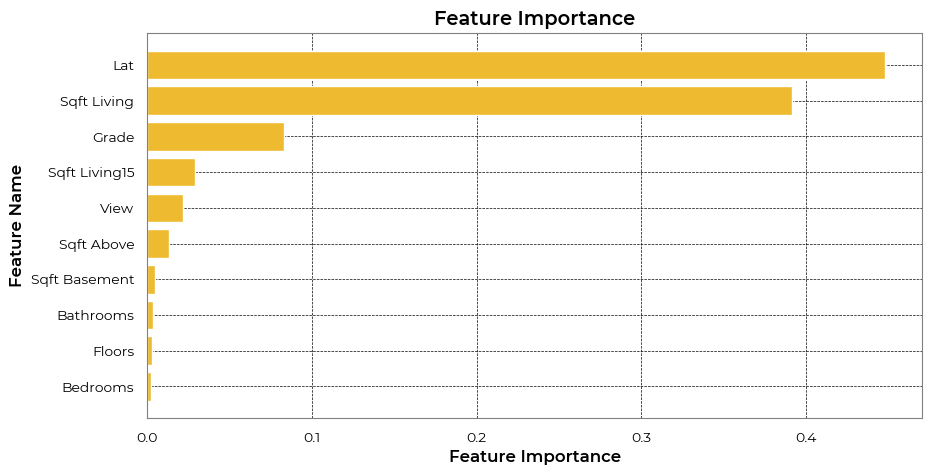

In [49]:
# Get feature importance scores
importance_df = dt.feature_score(final_model_wo, X_train)
importance_df

In [50]:
# Initialize RFE and select the top 5 features
correlated_columns, results_df, final_model_wo = dt.feature_selection(final_model_wo, X_train, X_test, y_train, y_test, features = 5)

Selected Features: Index(['grade', 'sqft_living', 'sqft_living15', 'lat', 'view'], dtype='object')
  Model Metrics: | R2 = 0.7501 | RMSE = 102612.6067 | MAE = 73658.2541 | MSE = 10529347053.1077 |
✅ The model performs well! It explains a large portion of the variance.



In [51]:
results_df.head(5)

,Actual Price,Predicted Price,Difference
16607,420000.0,542602.185484,-122602.185484
15557,230000.0,230736.619048,-736.619048
1285,270000.0,339879.411765,-69879.411765
5964,807000.0,766772.375000,40227.625000
7051,225000.0,248472.894737,-23472.894737


In [52]:
results, average = dt.cross_validate_model(df_without_outliers, correlated_columns, model_tree=final_model_wo)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.8267
Average Test R²:  0.7552
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.8267,0.7442
1,2,0.8300,0.7518
2,3,0.8273,0.7650
3,4,0.8227,0.7532
4,5,0.8271,0.7619


In [59]:
# Save the model
# with open('house_price_model_decision_tree_without_outliers.pkl', 'wb') as f2:
#     pickle.dump(final_model_wo, f2)

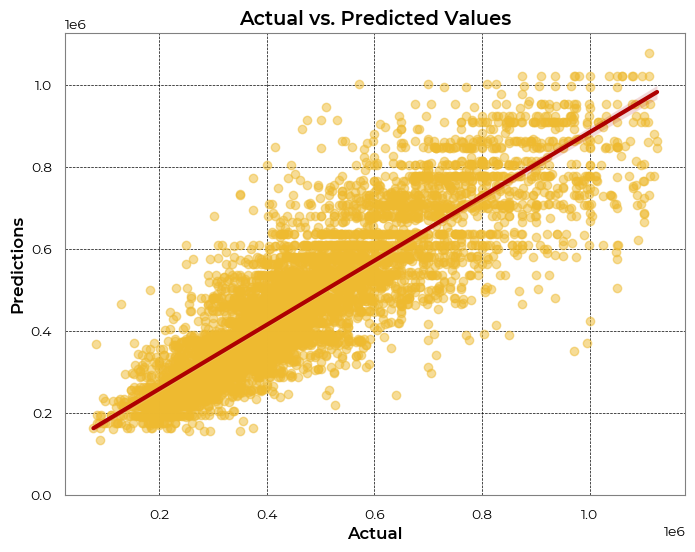

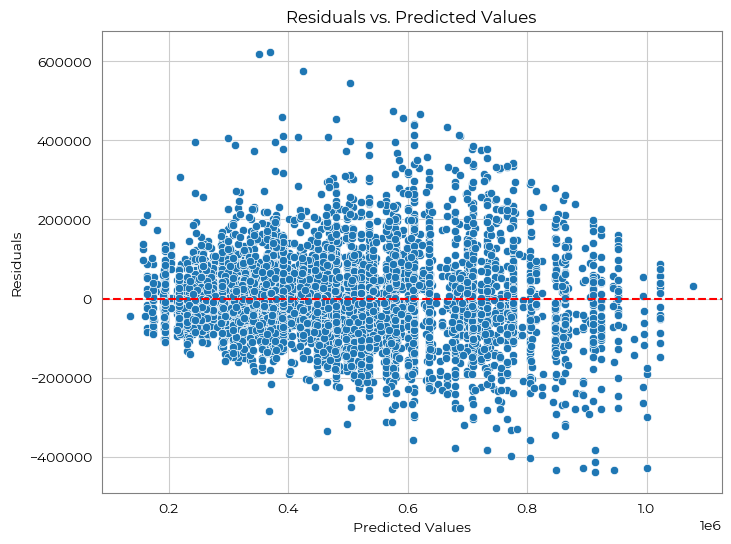

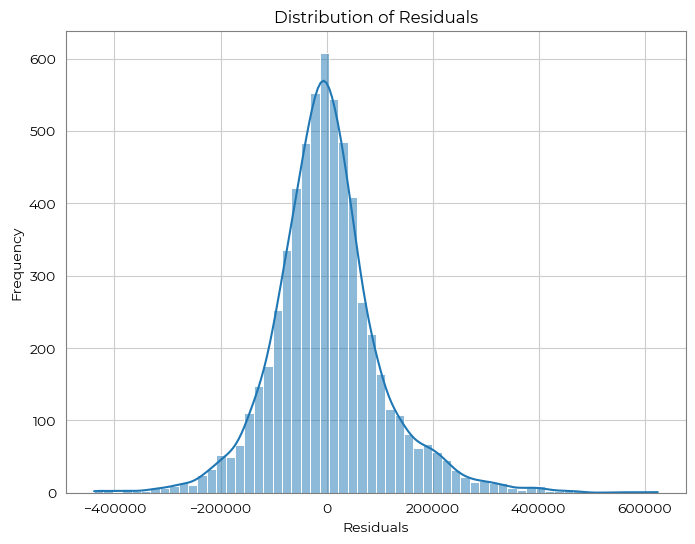

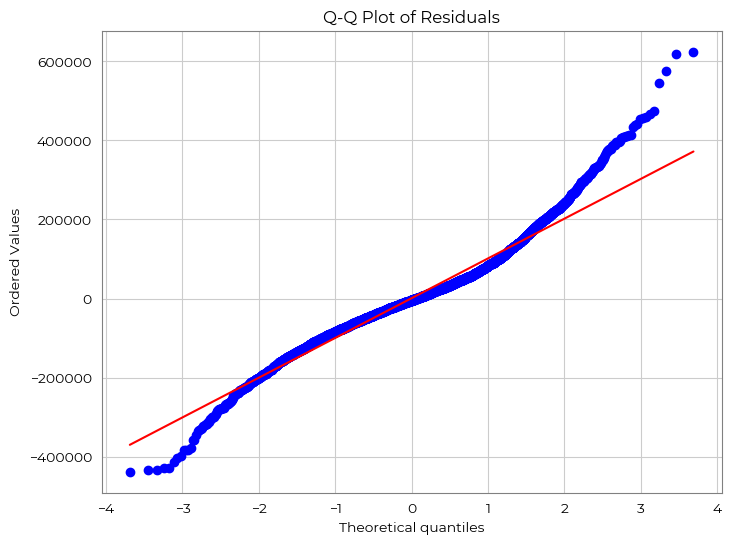

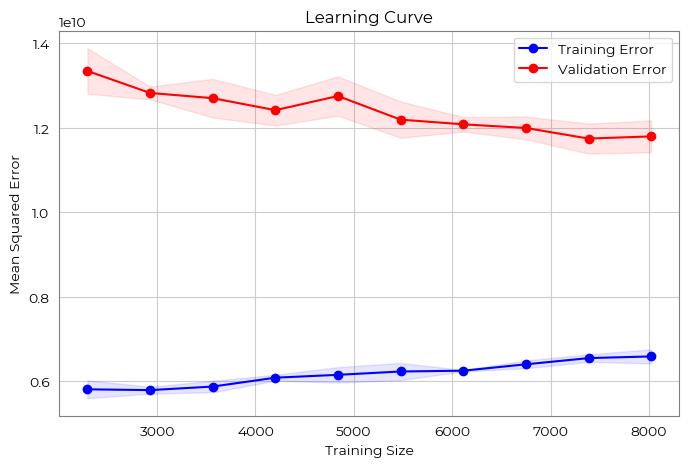

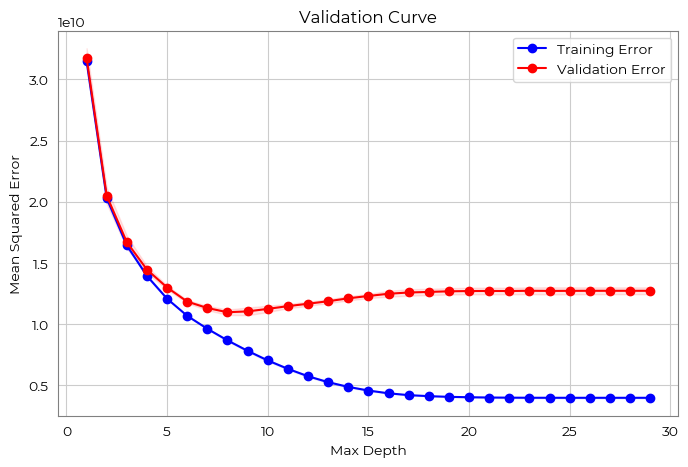

In [53]:
dt.model_validation(results_df, final_model_wo, X_train, X_test, y_train, y_test)